# House Price Advanced Regression-  Comprehensive Data Exploration Project

In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler
from scipy import stats 
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline

## 1. Data Investigation

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 1. Understand Our Data

With so many potential variables, I had to filter the spreadsheet and look carefully to the variables with 'High' Expectation, which are potential variables that have high influence on Sale Price

Through filtering,  conclude that the following variables can play an important role in this problem:
* **OverallQual**
* **YearBuilt**
* **TotalBsmtSF**
* **GrLivArea**

## 2. Analysing 'SalePrice'

In [5]:
#descriptive statistics summmary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

[Text(0.5, 1.0, 'Histogram of Sale Price')]

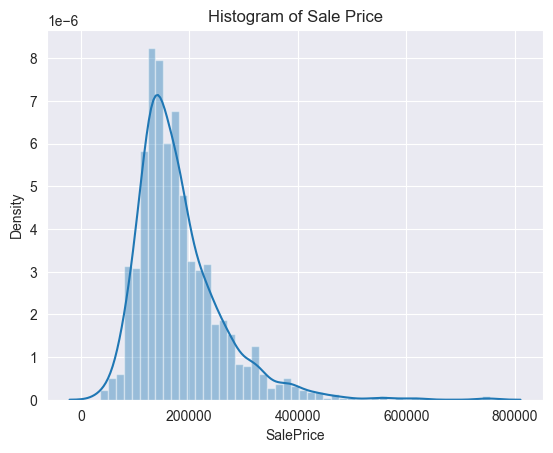

In [6]:
#histogram 
sns.distplot(df_train['SalePrice']).set(title = "Histogram of Sale Price")

Here are the following characteristics:
+ Deviate from the normal distribution

+ Have appreciable positive skewness

+ Show peakedness

In [7]:
#skewness and kurtosis 

print('Skewness: %f' %df_train['SalePrice'].skew())
print('Kurtosis: %f' %df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## 3. Relationship with numerical variable

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

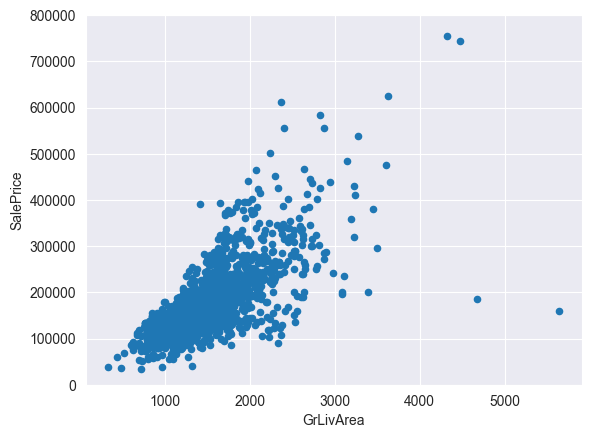

In [8]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0,800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

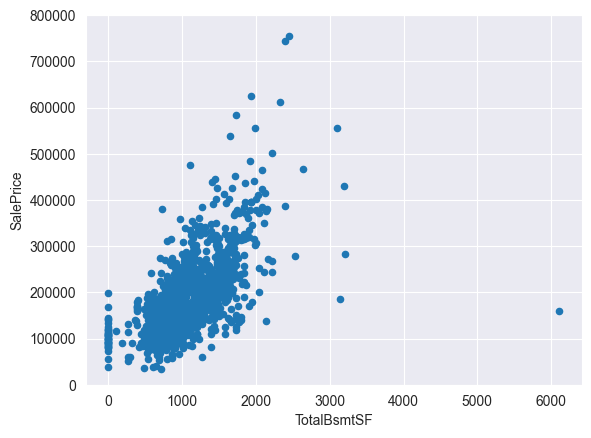

In [9]:
#Scatter Plot Total BsmtSF/ SalePrice
var= 'TotalBsmtSF'

data = pd.concat([df_train['SalePrice'], df_train[var]],axis =1)

data.plot.scatter(x = var, y= 'SalePrice', ylim = (0,800000))

We see that both these numerical variable has a storng positive relationship with SalePrice

## 4. Relationship with categorical features

Here I will examine how a categorical feature such as Overall Quality or Year Built might affect Sale Price

Text(0.5, 1.0, 'Overall Quality vs Sale Price')

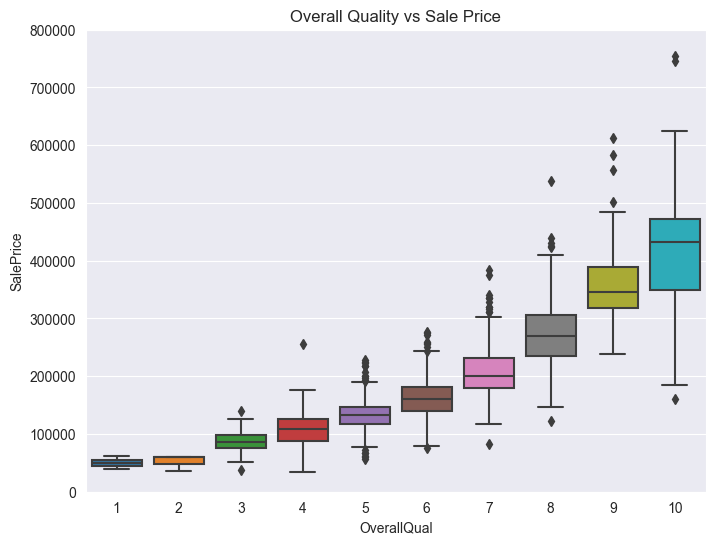

In [13]:
#Box plot overallqual/Sale price

var = 'OverallQual'

#Table that has both sale price and overall qual
data= pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)

#Draw out the table
f, ax = plt.subplots(figsize=(8,6))

#Draw the box plot
fig = sns.boxplot(x=var, y = 'SalePrice', data = data)

fig.axis(ymin=0, ymax = 800000)
plt.title('Overall Quality vs Sale Price')

From this visual, we can say that generally sale price does go up as overall quality go up

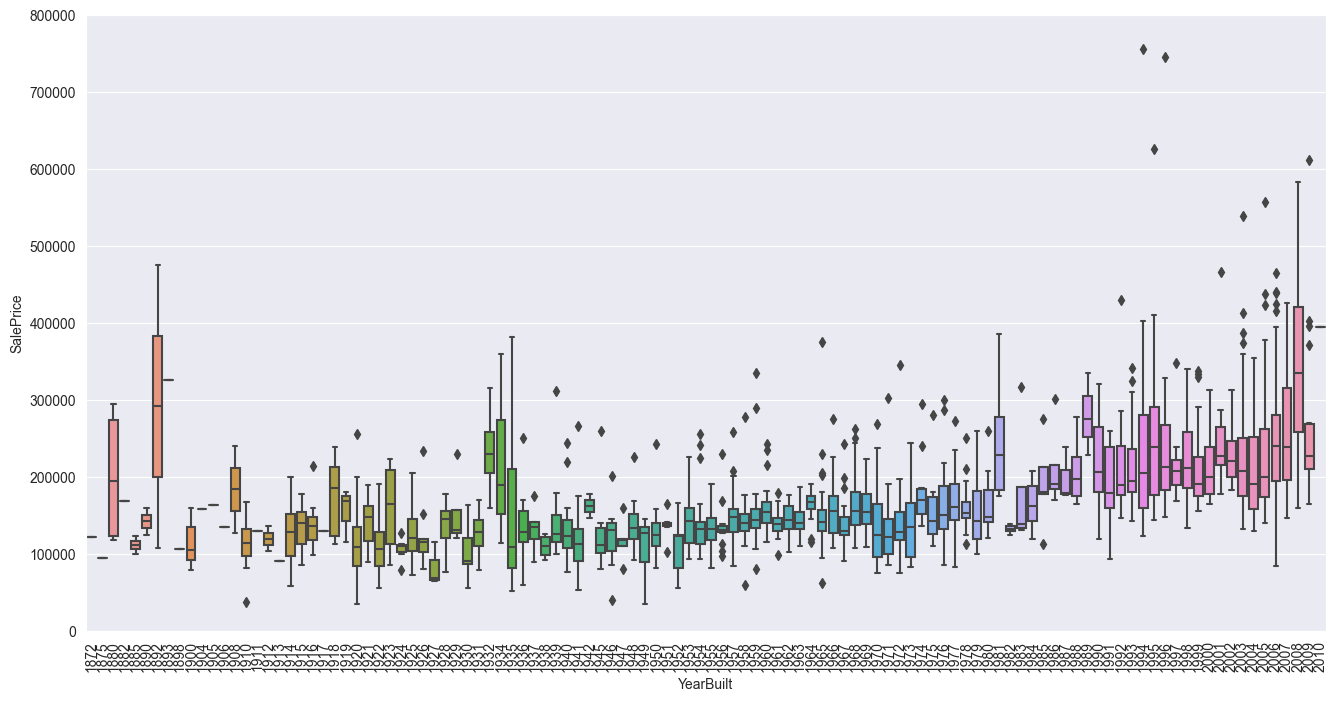

In [11]:
#Box plot for Year Built vs SalePrice
var = 'YearBuilt'

#Table that has both sale price and yearbuilt
data= pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)

#Draw out the table
f, ax = plt.subplots(figsize=(16,8))

#Draw the box plot
fig = sns.boxplot(x=var, y = 'SalePrice', data = data)

fig.axis(ymin=0, ymax = 800000);

plt.xticks(rotation =90);

Not a very strong relationship 

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

## 5. The 'plasma soup'

* **Correlation matrix(heatmap style)**

<AxesSubplot:>

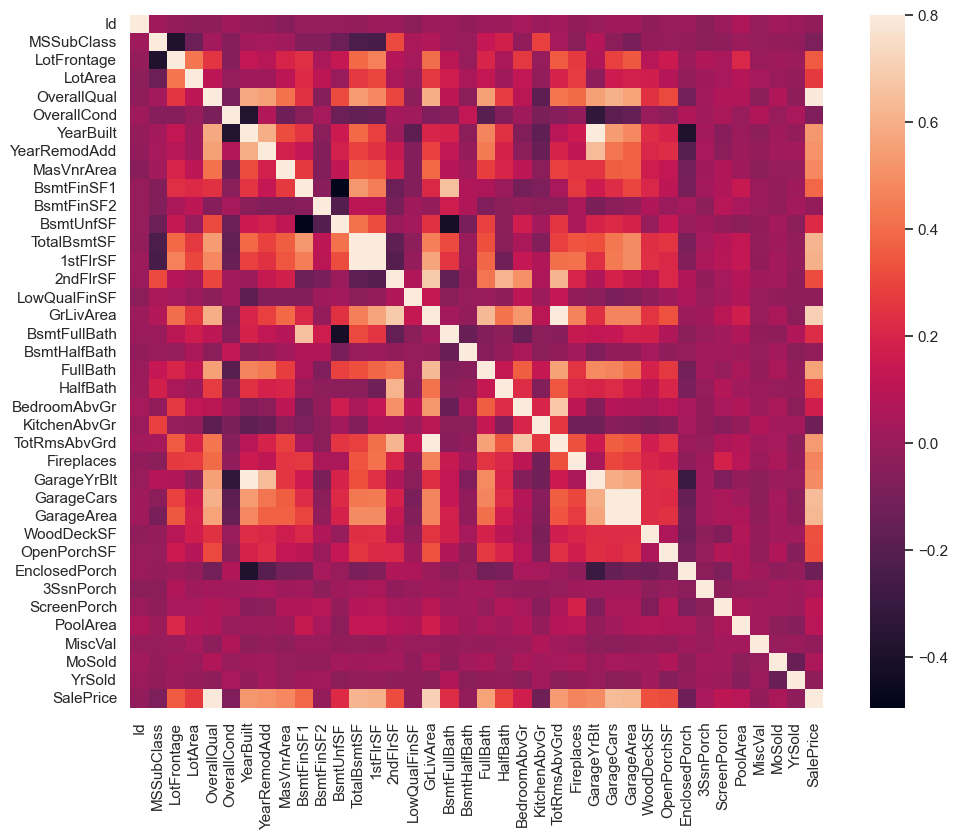

In [49]:
corrmat = df_train.corr()

f, ax = plt.subplots(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8, square = True).set(title = 'Corrleation Matrix on ')

This will give us the quickest overview of all the relationship between the variables

* **SalePrice correlation matrix (zoomed heatmap style)**

In [50]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cols
cm = np.corrcoef(df_train[cols].values.T)
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

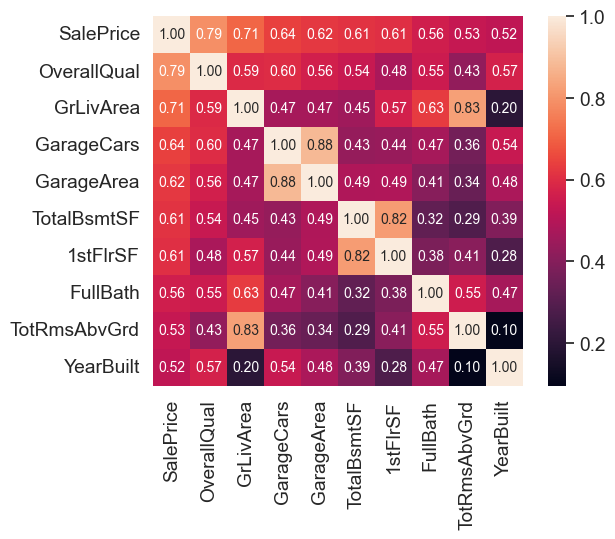

In [51]:
k = 10 #number of variables for heatmap
#Select the variables that has the largest correlation with Sale Price
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)#Create an arrray that has all the correlation info 
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, 
                fmt ='.2f', annot_kws= {'size':10}, yticklabels = cols.values,
                xticklabels = cols.values)
plt.show()

From this, we see that these variable has the strongest correlation with Sale Price

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' has the strongest
* 'GarageCars' and 'GarageArea' are also pretty strong, but these data are consequential (More area means more garage cars) -> We choose Garage Cars to analyze
* Total 'BsmtSF' and '1st Floor' is also seem to be twin brothers. So we can keep just 'TotalBsmtSf' to analyze
* 'FullBath'
* 'TotRmsAbvGrd' and 'GrLivArea'
* 'YearBuilt' 

### Scatter plots between 'SalePrice' and correlated variables

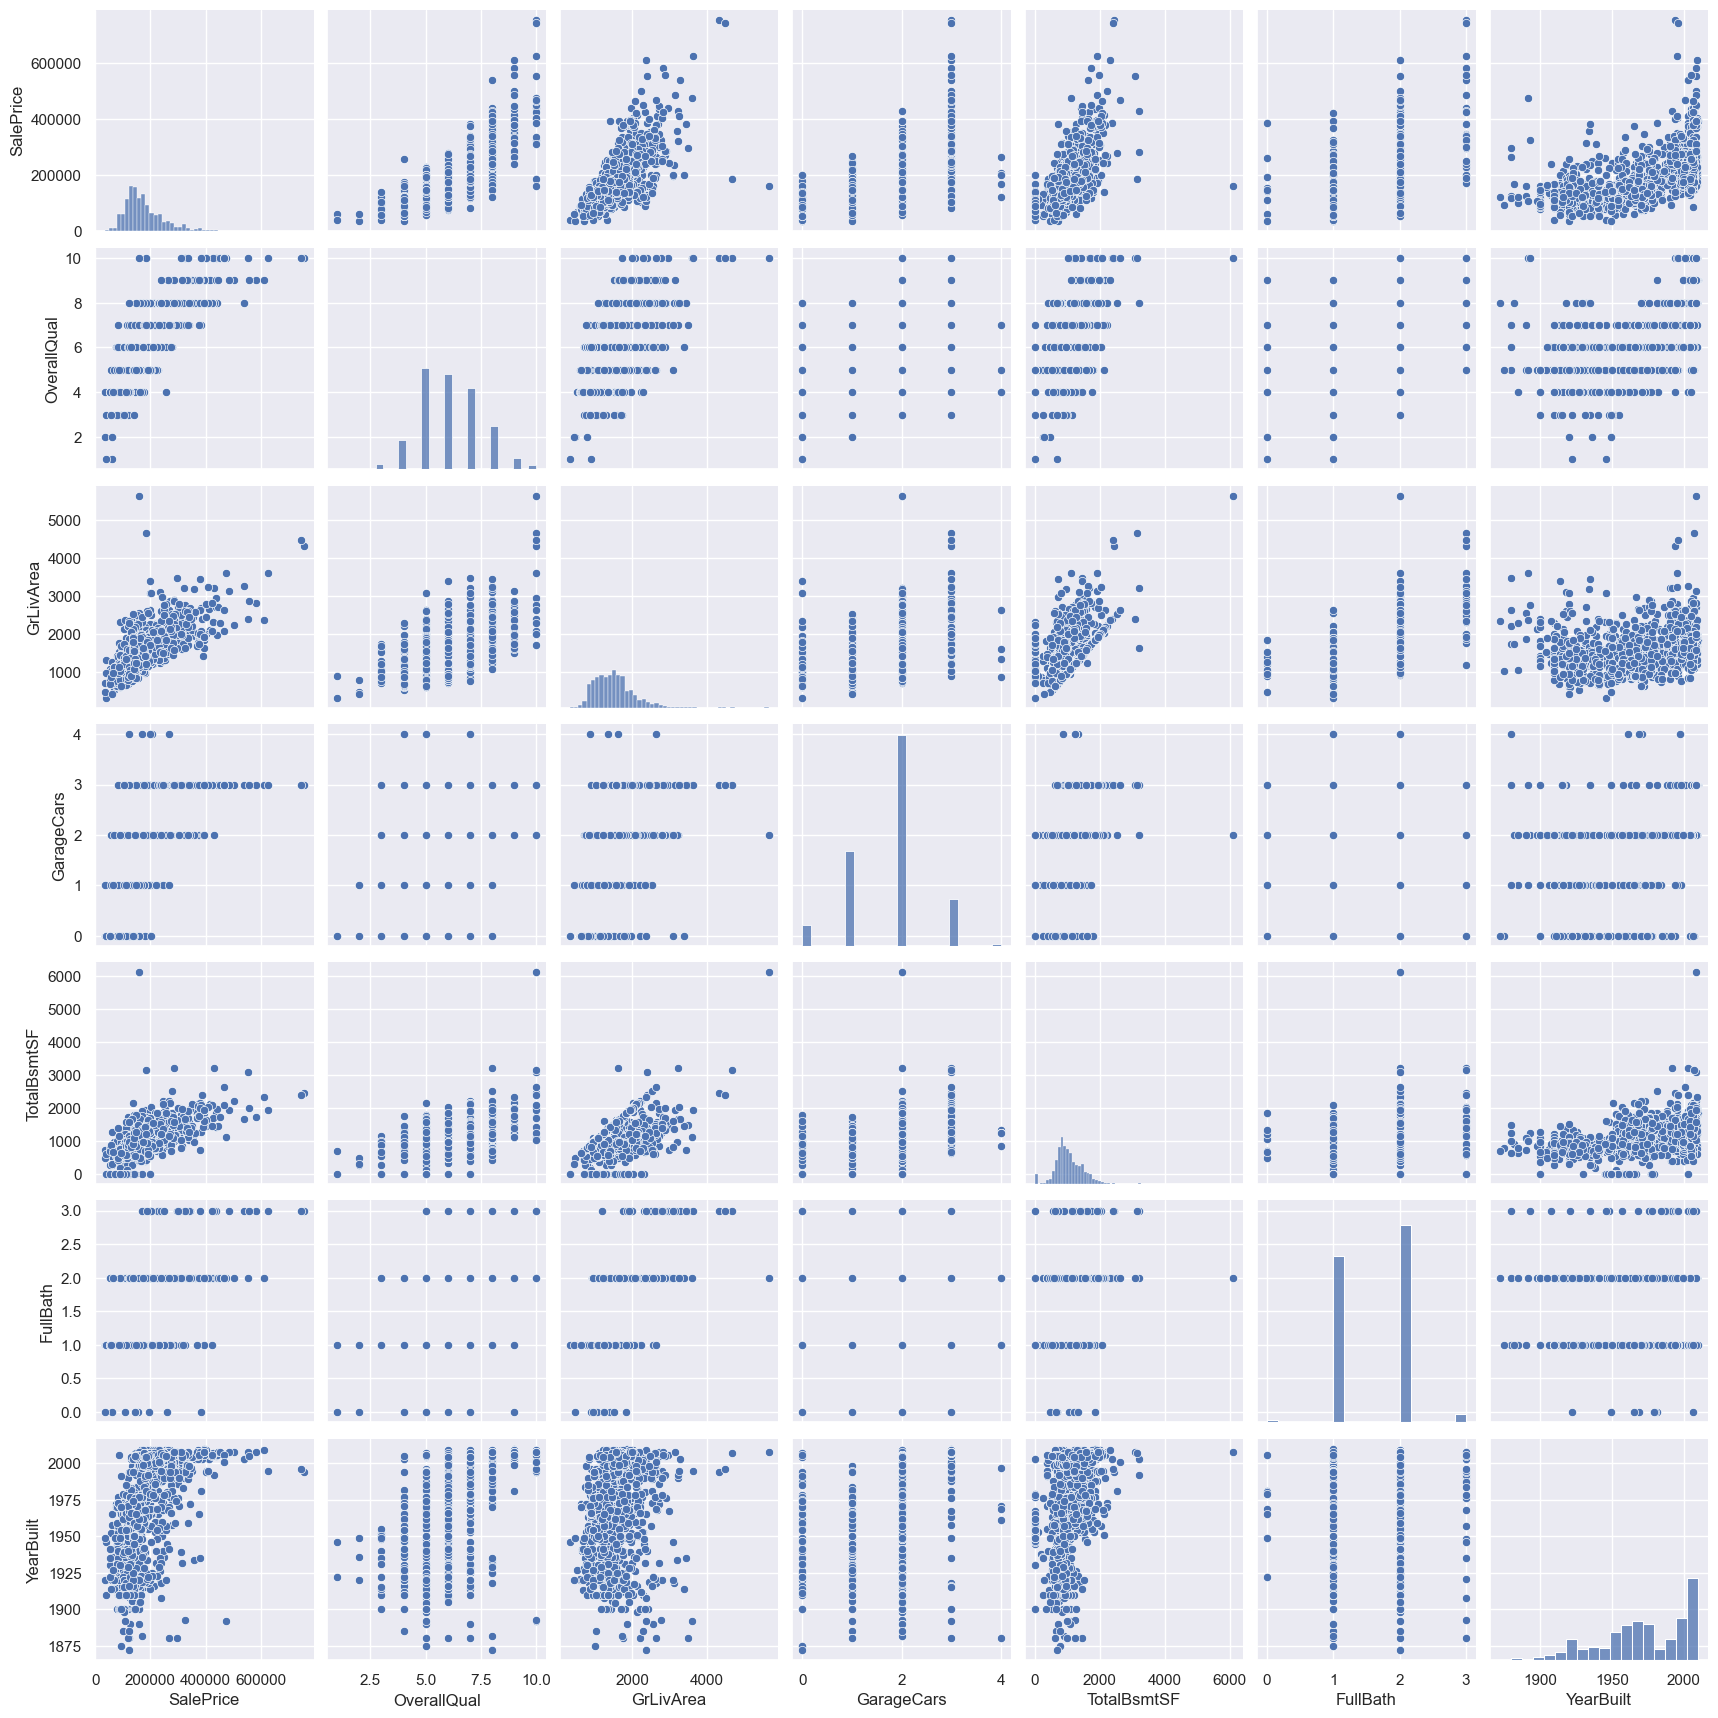

In [52]:
#scatterplot
sns.set()
cols = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 
        'TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols],size = 2.5)
plt.show();

## 4. Missing Data - Data Cleaning

In [53]:
#missing data percentage

#Count the total missing data from each column and create a Series
total =df_train.isnull().sum().sort_values(ascending = False)

#percent of missing data
percent = (df_train.isnull().sum() / df_train.isnull().count())

In [54]:
#Count all the column that has a null value
count_null =df_train.isnull().sum().sort_values(ascending = False)

#Count all the null value in each column
total_var = df_train.isnull().count().sort_values(ascending = False)

percent = ((count_null/total_var)*100).sort_values(ascending = False)

missing_data = pd.concat([count_null, percent], axis =1, keys = ['Total','Percent'])

missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


A rule of thumb indicates that if more than 15% of the data is missing, it should probably be deleted

However, I will make sure that that qualitatively these variable checks out
* "Pool QC", "MiscFeature", "Alley" that we should delete
* "GarageX" (Yr Built, Cond, Type,etc) has also been expressed by Garage Cars
* Same with MassVnArea and MasVNType
* Finally, 'Electrical' have one missing observation. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, I'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' I'll just delete the observation with missing data.


In [55]:
#Dealing with missing data

#All row with total null values >1
bad = missing_data[missing_data['Total'] > 1]

#Drop apply to main dataframe
df_train = df_train.drop(bad.index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1459 non-null   object
 3   LotArea        1459 non-null   int64 
 4   Street         1459 non-null   object
 5   LotShape       1459 non-null   object
 6   LandContour    1459 non-null   object
 7   Utilities      1459 non-null   object
 8   LotConfig      1459 non-null   object
 9   LandSlope      1459 non-null   object
 10  Neighborhood   1459 non-null   object
 11  Condition1     1459 non-null   object
 12  Condition2     1459 non-null   object
 13  BldgType       1459 non-null   object
 14  HouseStyle     1459 non-null   object
 15  OverallQual    1459 non-null   int64 
 16  OverallCond    1459 non-null   int64 
 17  YearBuilt      1459 non-null   int64 
 18  YearRemodAdd   1459 non-null

## Outliars


## Univariate analysis

Primary concern here is to establish a threshold that defines an observation as an outlier. 
- I will have to standardize our data. This means converting data values to have a mean of 0 and std of 1

In [57]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);

low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


With this analysis, Sale Price:
- Low range values are similar and are not too far from zero(within 1-2 std dev)
- High range values are far from 0 and the 7.ish values are really out of range 

## Bivariate analysis


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

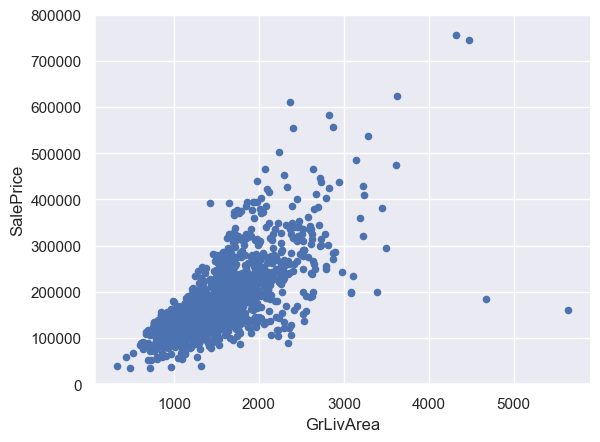

In [58]:
#bivariate analysis saleprice/grliving
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis =1)
data.plot.scatter(x=var, y= 'SalePrice', ylim = (0,800000))

- There are 2 values with bigger 'GrLivArea' seem strange and they are not following the crowd. Thus, we define them as outliers and delete them 
- The two observations in the top of the plot are those 7.ish observations that we said we should be careful about 

In [59]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 52].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

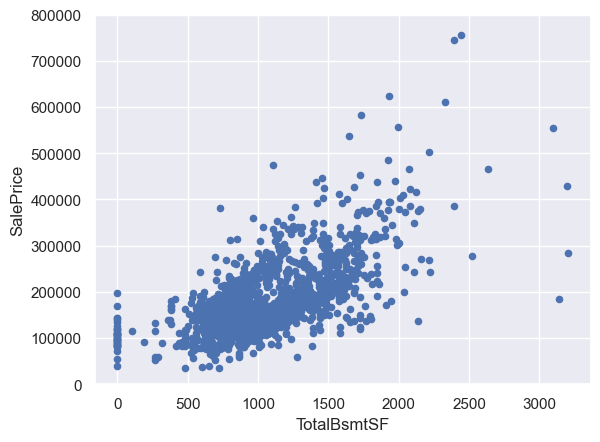

In [60]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'

data = pd.concat([df_train['SalePrice'], df_train[var]], axis =1)
data.plot.scatter(x=var, y= 'SalePrice', ylim = (0,800000))

To understand better what is "SalePrice"?:
- **Normality**: We will be checking the unvariate normality (normal on one variable), 
- **Homoscedasticity**:This refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s). Desirable bc we want the error term to be same across all values of the independent variables.
- **Linearity**: By examine scatter plots and search for linear patterns. If patterns not linear, we wil explore data transformations. 
- **Absence of correlated errors**: Correlated errors, like the definition suggest, happen when one error is correlated error. So if one positive error makes a negative error -> means that there is a relationship between these variables. If you detect sth like this, try to add a variable that can explain the effect you're getting

## Normality

The point here is to test 'SalePrice' in a lean way:
- **Histogram**: Kurtosis and skewness
- **Normal probability plot**: Data distribution should closely follow diagonal that represents the normal distribution

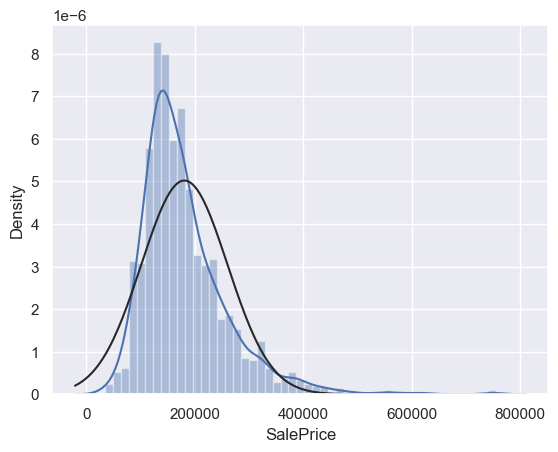

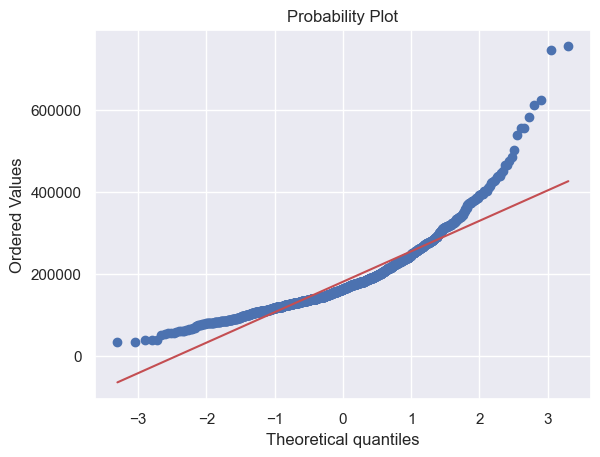

In [61]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure()

#Normal probability plot
res = stats.probplot(df_train['SalePrice'], plot =plt)

- As 'SalePrice' is not normal since it shows peakness and the positive skewness does not follow the diagonal line 

- Thus, I will  do some data transformation. In case of positive skewness, log transformation often works well

In [62]:
#apply log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

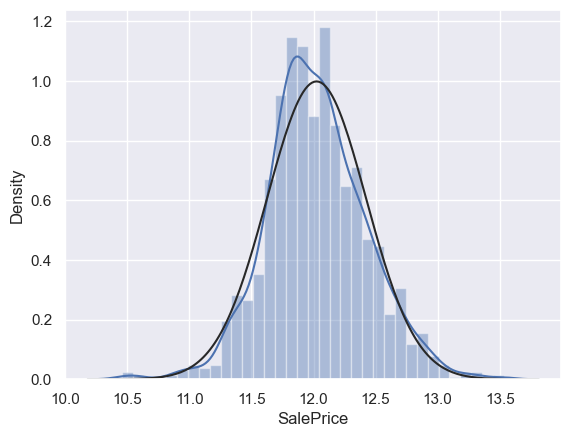

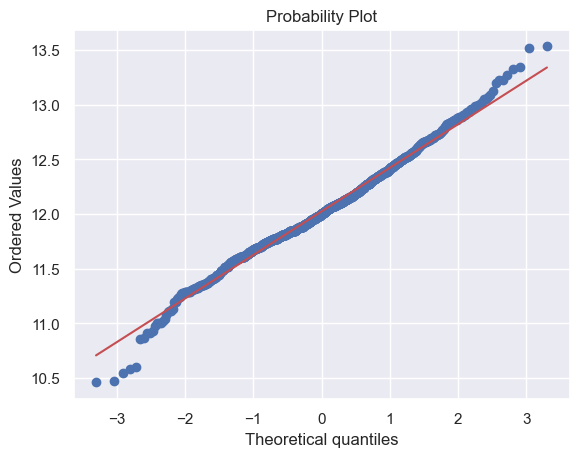

In [63]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit = norm);
fig = plt.figure()

res = stats.probplot(df_train['SalePrice'], plot = plt)

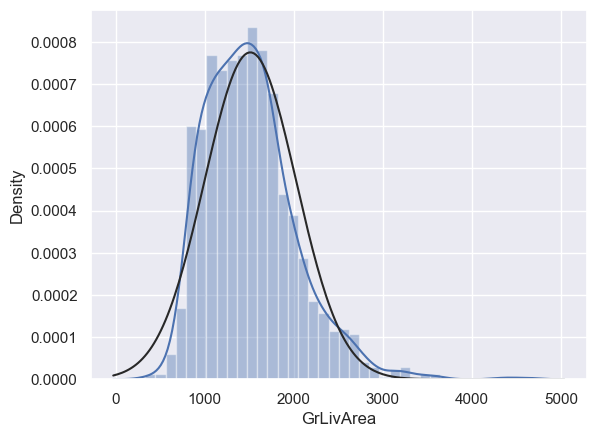

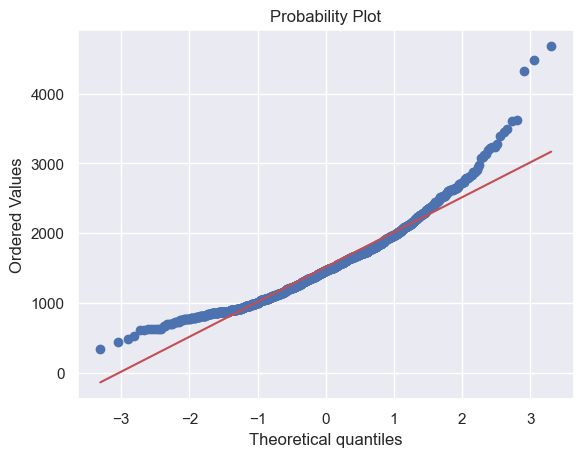

In [64]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

In [65]:
#data transformation
df_train['GrLivArea']  = np.log(df_train['GrLivArea'])

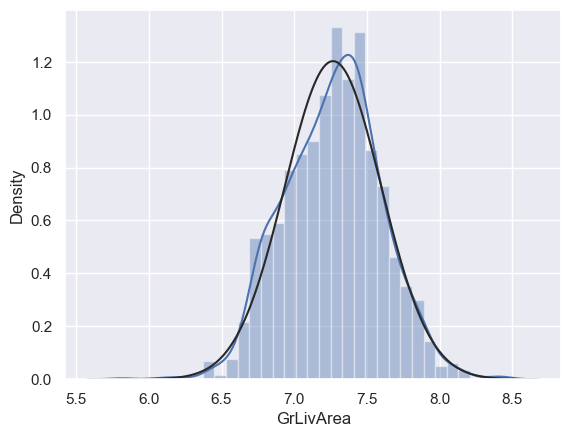

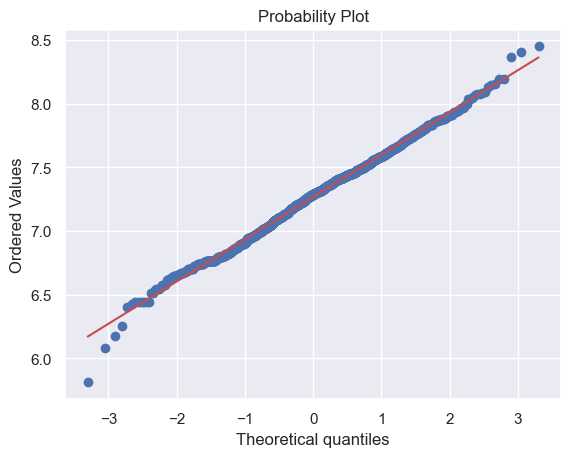

In [66]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

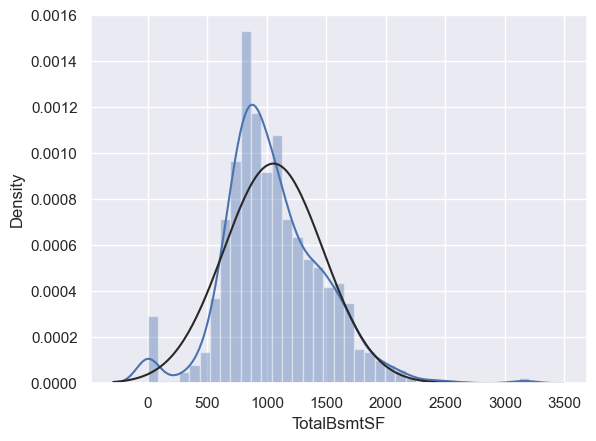

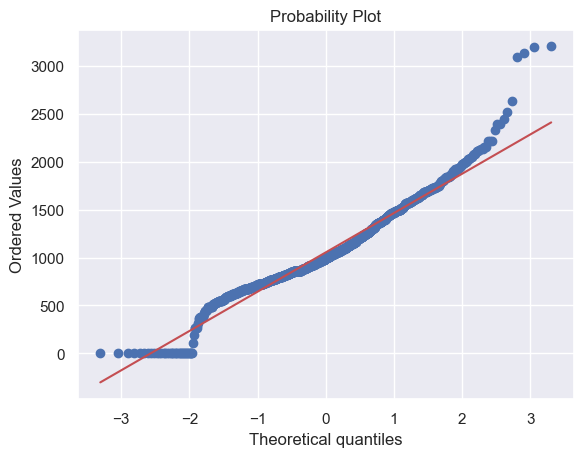

In [67]:
#Now to Total Bsmt SF
sns.distplot(df_train['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

Ok now everything is different, because:
- We have something that, in general, presents skewness
- A significant number of observations with zero value (houses with no basement)
- And with zero values, you can't do log transformations

To apply a log transformation here, I'll create a variable that can get the efffect of having or not having a basement (binary variable)
-> Then I will do the log transformation to all non-zero and drop all value zero data. This way we can transform the data without losing the effect of having or not basement.

In [68]:
#create column for new variable (one is enough because it's binary categorical feature)
#if area > 0 it gets 1, for are ==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index =df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF'] >0 , 'HasBsmt']  = 1


In [69]:
#transform data 
df_train .loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

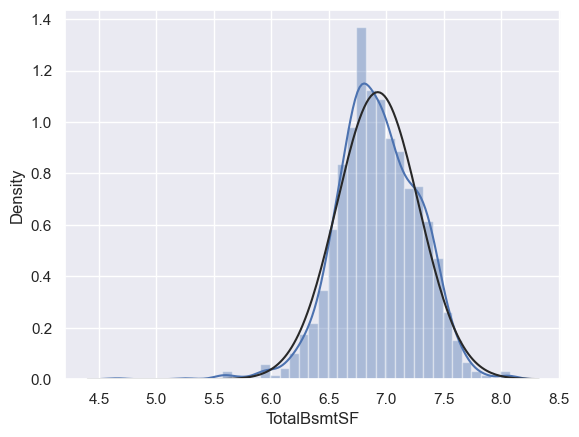

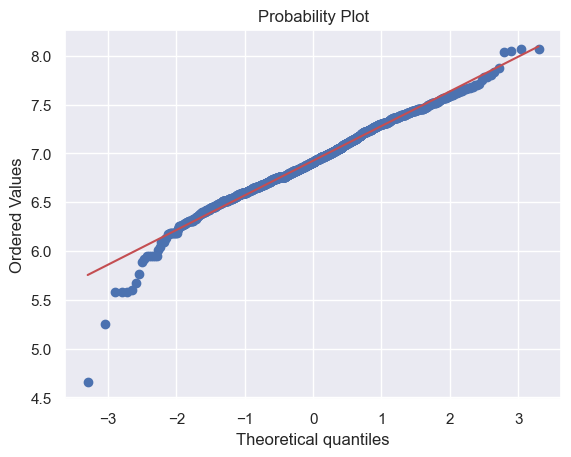

In [70]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] >0]['TotalBsmtSF'], plot = plt)

# Test homoscedasticity

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'...

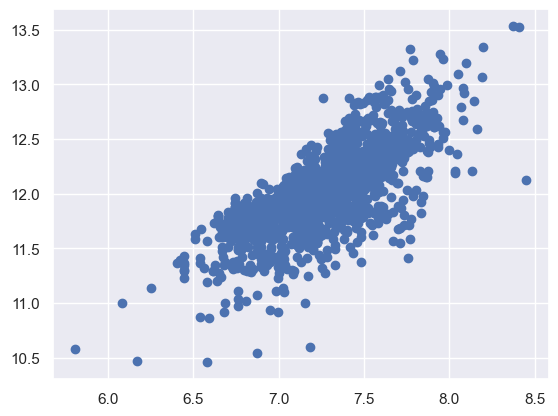

In [71]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

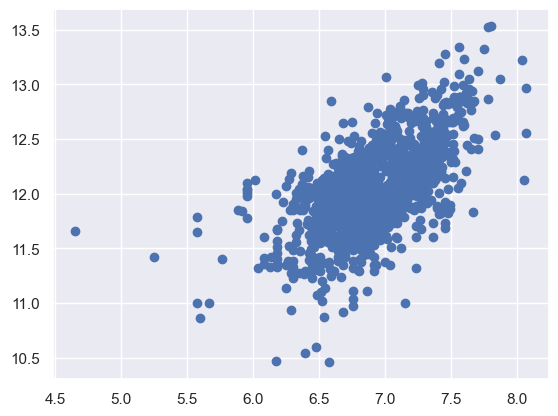

In [72]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

In [73]:
#Convert categorical variable into dummy
df_train = pd.get_dummies(df_train)